In [1]:
import pandas as pd

In [4]:
sp500 = pd.read_csv('../data/04JoiningDataFrames/SP500.csv')
gdp = pd.read_csv('../data/04JoiningDataFrames/WorldBank_GDP.csv')
pop = pd.read_csv('../data/04JoiningDataFrames/WorldBank_POP.csv')

In [11]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', how='left')

# Print gdp_sp500
print(gdp_sp500)

     Country Name Country Code     Indicator Name  Year           GDP    Date  \
0           China          CHN  GDP (current US$)  2010  6.087160e+12  2010.0   
1         Germany          DEU  GDP (current US$)  2010  3.417090e+12  2010.0   
2           Japan          JPN  GDP (current US$)  2010  5.700100e+12  2010.0   
3   United States          USA  GDP (current US$)  2010  1.499210e+13  2010.0   
4           China          CHN  GDP (current US$)  2011  7.551500e+12  2011.0   
5         Germany          DEU  GDP (current US$)  2011  3.757700e+12  2011.0   
6           Japan          JPN  GDP (current US$)  2011  6.157460e+12  2011.0   
7   United States          USA  GDP (current US$)  2011  1.554260e+13  2011.0   
8           China          CHN  GDP (current US$)  2012  8.532230e+12  2012.0   
9         Germany          DEU  GDP (current US$)  2012  3.543980e+12  2012.0   
10          Japan          JPN  GDP (current US$)  2012  6.203210e+12  2012.0   
11  United States          U

In [13]:
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date',
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['GDP','Returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())
gdp_sp500.plot()

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


In [15]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, how='inner')

# Print inflation_unemploy
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y='cpi', kind='scatter')
plt.show()

NameError: name 'inflation' is not defined

In [18]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['Year','Country Name'],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

            Country Name Country Code_x   Indicator Name_x  Year  \
0            Afghanistan            NaN                NaN  2010   
1                Albania            NaN                NaN  2010   
2                Algeria            NaN                NaN  2010   
3         American Samoa            NaN                NaN  2010   
4                Andorra            NaN                NaN  2010   
...                  ...            ...                ...   ...   
2643  West Bank and Gaza            USA  GDP (current US$)  2018   
2644               World            USA  GDP (current US$)  2018   
2645         Yemen, Rep.            USA  GDP (current US$)  2018   
2646              Zambia            USA  GDP (current US$)  2018   
2647            Zimbabwe            USA  GDP (current US$)  2018   

               GDP Country Code_y   Indicator Name_y           Pop  
0              NaN            AFG  Population, total  2.918551e+07  
1              NaN            ALB  Population

In [19]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['Country Name', 'Year'], fill_method='ffill')

# Print date_ctry
print(date_ctry)

     Country Name Country Code_x   Indicator Name_x  Year           GDP  \
0     Afghanistan            NaN                NaN  2010           NaN   
1     Afghanistan            NaN                NaN  2011           NaN   
2     Afghanistan            NaN                NaN  2012           NaN   
3     Afghanistan            NaN                NaN  2012           NaN   
4     Afghanistan            NaN                NaN  2013           NaN   
...           ...            ...                ...   ...           ...   
2643     Zimbabwe            USA  GDP (current US$)  2014  2.049410e+13   
2644     Zimbabwe            USA  GDP (current US$)  2015  2.049410e+13   
2645     Zimbabwe            USA  GDP (current US$)  2016  2.049410e+13   
2646     Zimbabwe            USA  GDP (current US$)  2017  2.049410e+13   
2647     Zimbabwe            USA  GDP (current US$)  2018  2.049410e+13   

     Country Code_y   Indicator Name_y         Pop  
0               AFG  Population, total  291855

In [20]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

NameError: name 'jpm' is not defined

In [1]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color='c', rot=90)
plt.show()


NameError: name 'pd' is not defined

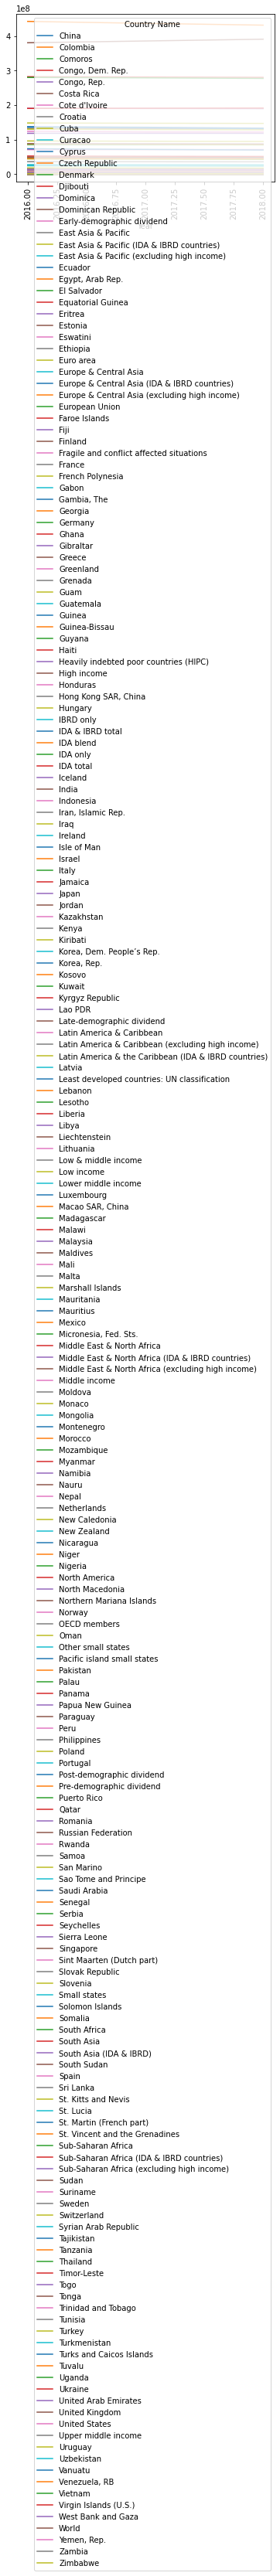

In [13]:
# Merge gdp and pop on date and country with fill
import matplotlib.pyplot as plt
import pandas as pd
gdp_pop = pd.merge_ordered(gdp, pop, on=['Country Name','Year'], fill_method='ffill')

# Add a column named gdp_per_captia to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['GDP'] / gdp_pop['Pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'Year', 'Country Name')

# Select dates equal to or greater than 2016-01-01
recent_gdp_pop = gdp_pivot.query('Year >= 2016')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

In [15]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date', ascending=True)

# Plot the unempl_rate by date
ur_sorted.plot(y='unempl_rate', x='date')
plt.show()

NameError: name 'ur_wide' is not defined

In [ ]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', suffixes=('_dow', '_bond'), how='inner')


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()